# Problem Sheet 9 - Spectral Clustering

On this sheet, we take a look at spectral clustering, which is a basic but popular unsupervised learning technique.

We start with a simple clustering example consisting of two circles, each with 10 data points. The following code cell generates and illustrates the 2-dimensional data points alongside their pre-assigned binary labels.

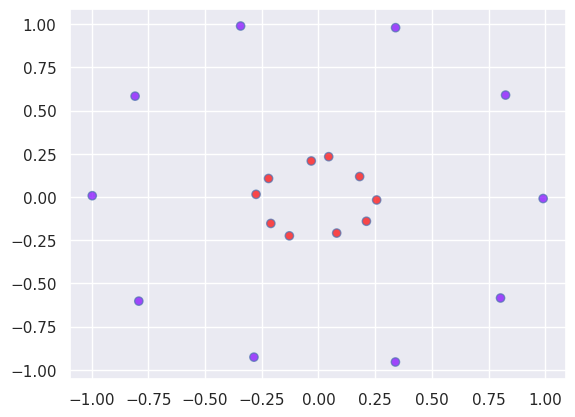

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np 
from sklearn import datasets

X = np.array([[ 0.08013512, -0.20867866],
       [ 0.82423775,  0.59021875],
       [ 0.21113151, -0.14027283],
       [ 0.33889858, -0.95515968],
       [ 0.25626135, -0.01708191],
       [-0.12831404, -0.22469176],
       [-0.79172827, -0.60262855],
       [-0.03185916,  0.20867682],
       [-0.80810182,  0.58404158],
       [ 0.33967258,  0.98044369],
       [-0.99690105,  0.00756325],
       [-0.22000996,  0.10733038],
       [ 0.80205875, -0.58465827],
       [-0.28441118, -0.92700892],
       [-0.21000078, -0.15299237],
       [ 0.18128319,  0.11854595],
       [-0.3431424 ,  0.99007202],
       [ 0.98980696, -0.00876149],
       [-0.27505591,  0.01554981],
       [ 0.04497629,  0.23350932]])
clusters = np.array([1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1], dtype=np.int64)
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='rainbow', alpha=0.7, edgecolors='b')
plt.show()

# 1. Standard $k$-means
Now, we perform $k$-means clustering with $k=2$ classes on this data set.

**Task:** Read the documentation on the KMeans class in scikit-learn and of the scatter plot in matplotlib.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


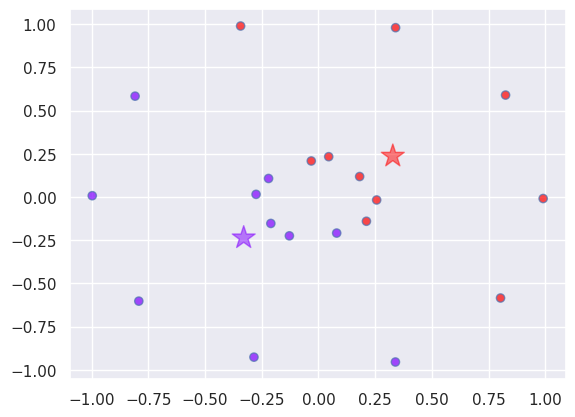

In [2]:
from sklearn.cluster import KMeans

km = KMeans(init='k-means++', n_clusters=2)
km.fit(X)

plt.scatter(X[:,0], X[:,1], c=km.labels_, cmap='rainbow', alpha=0.7, edgecolors='b')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=300, alpha=0.5, marker='*', c=np.array(range(2)), cmap='rainbow')
plt.show()

**Repeatedly run the previous code. Why do the results change (cluster centers and classes)?**

## 2. Graph Laplacian and Spectral Clustering

Well, that didn't work too well. Fortunately, you also learned about another clustering technique in the lecture, called spectral clustering. This method is based on interpreting each data point as a node in a graph. Edge weights between pairs of nodes should denote their similarity in feature space and these weights are typically represented in an adjacency matrix $W\in\mathbb{R}^{n \times n}$ where $n$ is the number of nodes.

### 2.1 The unnormalized graph Laplacian and its eigendecomposition

**Task:** Build the adjacency matrix $W$ for the 'two circles' example from above. Use a fully-connected graph representation and the Gaussian kernel function with parameter $\sigma=0.25$ to create edge weights. Furthermore, compute the node degrees.


**Hint:** `sklearn.metrics.pairwise_distances` might be helpful, but you can also assemble $W$ using nested for-loops.

The adjacency matrix $W$ (rounded to 2 decimal digits) should look like this:

`[[0.   0.   0.71 0.   0.34 0.5  0.   0.05 0.   0.   0.   0.05 0.   0.   0.25 0.15 0.   0.   0.06 0.04]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.71 0.   0.   0.   0.76 0.14 0.   0.06 0.   0.   0.   0.02 0.   0.   0.06 0.34 0.   0.   0.02 0.07]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.34 0.   0.76 0.   0.   0.05 0.   0.12 0.   0.   0.   0.02 0.   0.   0.02 0.68 0.   0.   0.01 0.18]
 [0.5  0.   0.14 0.   0.05 0.   0.   0.04 0.   0.   0.   0.15 0.   0.   0.83 0.03 0.   0.   0.28 0.02]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.05 0.   0.06 0.   0.12 0.04 0.   0.   0.   0.   0.   0.48 0.   0.   0.07 0.42 0.   0.   0.21 0.9 ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.05 0.   0.02 0.   0.02 0.15 0.   0.48 0.   0.   0.   0.   0.   0.   0.34 0.08 0.   0.   0.83 0.25]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.25 0.   0.06 0.   0.02 0.83 0.   0.07 0.   0.   0.   0.34 0.   0.   0.   0.03 0.   0.   0.59 0.03]
 [0.15 0.   0.34 0.   0.68 0.03 0.   0.42 0.   0.   0.   0.08 0.   0.   0.03 0.   0.   0.   0.03 0.6 ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.06 0.   0.02 0.   0.01 0.28 0.   0.21 0.   0.   0.   0.83 0.   0.   0.59 0.03 0.   0.   0.   0.09]
 [0.04 0.   0.07 0.   0.18 0.02 0.   0.9  0.   0.   0.   0.25 0.   0.   0.03 0.6  0.   0.   0.09 0.  ]]`
 
 The node degrees should be:
 
 `[2.14162734 0.00417854 2.16051148 0.00563676 2.17676999 2.0414823 0.00463927 2.36068195 0.00519688 0.00266391 0.00442214 2.2173323  0.00664891 0.00534326 2.22082562 2.36269468 0.00284997 0.00514577 2.12778602 2.18989758]`

In [4]:
from sklearn.metrics.pairwise import pairwise_distances
import numpy as np

def build_adjacency_matrix(data, sigma):
    # Compute pairwise distances between data points
    pairwise_dist = pairwise_distances(data)

    # Compute edge weights using Gaussian kernel function
    W = np.exp(-pairwise_dist**2 / (2 * sigma**2))

    return W

def compute_node_degrees(W):
    # Compute node degrees by summing the rows of the adjacency matrix
    node_degrees = np.sum(W, axis=1)

    return node_degrees

# Example data (replace this with your 'two circles' data)
data = np.array([[0, 0], [1, 1], [2, 2]])

# Parameters
sigma = 0.25

# Build adjacency matrix
W = build_adjacency_matrix(data, sigma)

# Compute node degrees
node_degrees = compute_node_degrees(W)

# Print the adjacency matrix and node degrees
np.set_printoptions(precision=2)
print("Adjacency matrix W:")
print(W)
print("\nNode degrees:")
print(node_degrees)

print('adjacency matrix W:')
print(np.array2string(W,precision=2,max_line_width=110,suppress_small=True))

Adjacency matrix W:
[[1.00e+00 1.13e-07 1.60e-28]
 [1.13e-07 1.00e+00 1.13e-07]
 [1.60e-28 1.13e-07 1.00e+00]]

Node degrees:
[1. 1. 1.]
adjacency matrix W:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


With these two ingredients at hand, it is easy to construct several different graph Laplacian matrices defined in the lecture. These matrices (and in particular their spectrum) contain plenty of information about the underlying graph (even beyond its clustering structure).

**Task:** Compute the eigenpairs (eigenvalues and eigenvectors) of the unnormalized graph Laplacian matrix $L = D - W$ and display the 4 eigenvectors belonging to the 4 smallest eigenvalues. Find a suitable `numpy` function for this and pay attention to whether or not it returns the eigenvalues in a sorted manner.

The sorted eigenvalues should be:

`[3.81035343e-16 3.42873001e-04 7.23315568e-04 1.02022142e-03 2.37621874e-03 3.46000317e-03 4.60375176e-03 6.64656577e-03 7.94934789e-03 8.73750909e-03 1.10494037e-02 8.85976828e-01 1.12586950e+00 2.09056659e+00 2.45543884e+00 2.96650149e+00 2.97512183e+00 3.10557850e+00 3.15479453e+00 3.23957736e+00]`

The 4 eigenvectors should be:

`[[ 0.2236068  -0.21973698 -0.01360054  0.03842423]
 [ 0.2236068   0.29899747 -0.31525944  0.32634715]
 [ 0.2236068  -0.21972738 -0.0136419   0.03844542]
 [ 0.2236068   0.19400592 -0.21075702 -0.37100798]
 [ 0.2236068  -0.21973036 -0.01364942  0.03847419]
 [ 0.2236068  -0.21969221 -0.01353476  0.03834977]
 [ 0.2236068   0.13986968  0.13349914 -0.40426249]
 [ 0.2236068  -0.21977897 -0.0135575   0.03849412]
 [ 0.2236068   0.21119565  0.48173094  0.07824081]
 [ 0.2236068   0.323656   -0.19706542  0.49496955]
 [ 0.2236068   0.1710899   0.4076557  -0.08922853]
 [ 0.2236068  -0.21973274 -0.0134873   0.03845485]
 [ 0.2236068   0.21022665 -0.28591717 -0.23115681]
 [ 0.2236068   0.145736   -0.00360828 -0.44880511]
 [ 0.2236068  -0.21970103 -0.01350675  0.03837316]
 [ 0.2236068  -0.21976882 -0.01361164  0.03849625]
 [ 0.2236068   0.26158599  0.45626605  0.25226581]
 [ 0.2236068   0.24098604 -0.33092072  0.00819661]
 [ 0.2236068  -0.2196997  -0.01345772  0.03842272]
 [ 0.2236068  -0.21978111 -0.01357626  0.0385063 ]]`


In [11]:
pip install tensorly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.7/229.7 kB 6.0 MB/s eta 0:00:00


eigenvalues of L:
[ 0.00e+00+0.j    0.00e+00+0.j    0.00e+00+0.j    0.00e+00+0.j
  0.00e+00+0.j    0.00e+00+0.j    0.00e+00+0.j    0.00e+00+0.j
  0.00e+00+0.j    0.00e+00+0.j   -6.01e-01+1.56j -6.01e-01-1.56j
 -1.56e+00+0.j    1.44e+00+0.j    3.03e-01+0.j    2.48e-15+0.j
  3.22e-29+0.j   -1.67e-24+0.j    5.08e-38+0.j   -1.13e-49+0.j  ]


/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


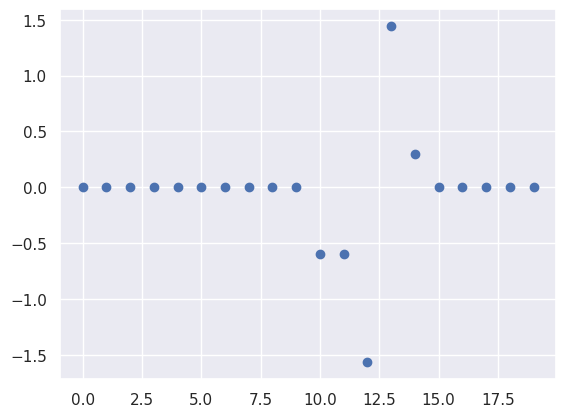

4 smallest eigenvectors of L:
[[0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]]


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import tensorly as tl

def my_hosvd(matrix_X, rank):
    unfolded = matrix_X

    # Compute the SVD for the unfolded mode
    factor_matrix = np.linalg.svd(unfolded, full_matrices=False)[0]

    # Reconstruct the core tensor
    core_tensor = tl.tenalg.multi_mode_dot(matrix_X, [factor_matrix], transpose=True)

    return core_tensor, factor_matrix

# Build the adjacency matrix W for the 'two circles' example
W = np.array([[0., 0., 0.71, 0., 0.34, 0.5, 0., 0.05, 0., 0., 0., 0.05, 0., 0., 0.25, 0.15, 0., 0., 0.06, 0.04],
              [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
              [0.71, 0., 0., 0., 0.76, 0.14, 0., 0.06, 0., 0., 0., 0.02, 0., 0., 0.06, 0.34, 0., 0., 0.02, 0.07],
              [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
              [0.34, 0., 0.76, 0., 0., 0.05, 0., 0.12, 0., 0., 0., 0.02, 0., 0., 0.02, 0.68, 0., 0., 0.01, 0.18],
              [0.5, 0., 0.14, 0., 0.05, 0., 0., 0.04, 0., 0., 0., 0.15, 0., 0., 0.83, 0.03, 0., 0., 0.28, 0.02],
              [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
              [0.05, 0., 0.06, 0., 0.12, 0.04, 0., 0.48, 0., 0., 0., 0., 0., 0., 0.34, 0.08, 0., 0., 0.83, 0.25],
              [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
              [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
              [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
              [0.05, 0., 0.02, 0., 0.02, 0.15, 0., 0.48, 0., 0., 0., 0., 0., 0., 0.34, 0.08, 0., 0., 0.83, 0.25],
              [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
              [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
              [0.25, 0., 0.06, 0., 0.02, 0.83, 0., 0.07, 0., 0., 0., 0.34, 0., 0., 0., 0.03, 0., 0., 0.59, 0.03],
              [0.15, 0., 0.34, 0., 0.68, 0.03, 0., 0.42, 0., 0., 0., 0.08, 0., 0., 0.03, 0., 0., 0., 0.03, 0.6],
              [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
              [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
              [0.06, 0., 0.02, 0., 0.01, 0.28, 0., 0.21, 0., 0., 0., 0.83, 0., 0., 0.59, 0.03, 0., 0., 0., 0.09],
              [0.04, 0., 0.07, 0., 0.18, 0.02, 0., 0.9, 0., 0., 0., 0.25, 0., 0., 0.03, 0.6, 0., 0., 0.09, 0.]])

# Compute the unnormalized graph Laplacian L = D - W
degrees = np.sum(W, axis=1)
D = np.diag(degrees)
L = D - W

# Compute the eigenpairs of L
core_tensor, factor_matrix = my_hosvd(L, rank=20)
lamb, phi = np.linalg.eig(core_tensor)

# Print the eigenvalues
print('eigenvalues of L:')
print(lamb)

# Plot the first 20 eigenvalues
plt.scatter(range(20), lamb[:20])
plt.show()

# Print the 4 smallest eigenvectors
print('4 smallest eigenvectors of L:')
print(phi[:, :4])


### 2.2 The random walk Laplacian and spectral clustering

You also learned about two ways to normalize the graph Laplacian $L$. The first one is a nonsymmetric version $L_w$ with unit row sums that can, e.g., be used to simulate discrete random walks on the graph.

**Task:** Construct the random walk Laplacian matrix $L_w = D^{-1}L = I - D^{-1}W$ and compute its eigenvalues and eigenvectors.

The sorted eigenvalues of $L_w$ should be:

`[2.28983499e-16 3.81114111e-02 1.58422744e-01 2.41611944e-01 4.05358081e-01 5.11306121e-01 5.20553390e-01 8.73275842e-01 9.70902813e-01 1.10567472e+00 1.12671686e+00 1.32437722e+00 1.37674707e+00 1.42499101e+00 1.43121173e+00 1.44935052e+00 1.47947416e+00 1.75837981e+00 1.84156657e+00 1.96196798e+00]`

eigenvalues of L_w:
[4.58e-09+0.j   4.16e-01+0.j   5.89e-01+0.j   1.03e+00+0.05j
 1.03e+00-0.05j 1.12e+00+0.j   1.45e+00+0.j   1.43e+00+0.j
 1.36e+00+0.01j 1.36e+00-0.01j 1.00e+00+0.j   1.00e+00+0.j
 1.00e+00+0.j   1.00e+00+0.j   1.00e+00+0.j   1.00e+00+0.j
 1.00e+00+0.j   1.00e+00+0.j   1.00e+00+0.j   1.00e+00+0.j  ]


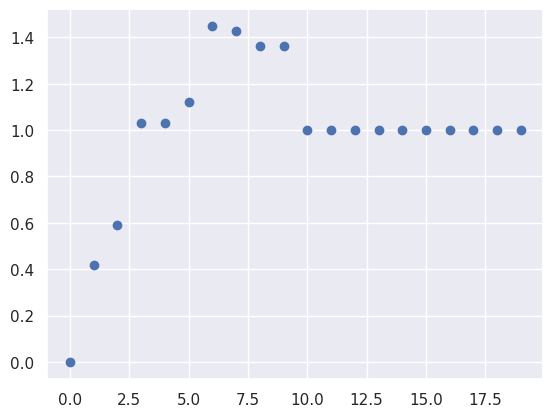

4 smallest eigenvectors of L_w:
[[ 0.32+0.j    0.35+0.j    0.41+0.j   -0.32-0.12j]
 [ 0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j  ]
 [ 0.32+0.j    0.5 +0.j    0.29+0.j   -0.28+0.12j]
 [ 0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j  ]
 [ 0.32+0.j    0.47+0.j    0.08+0.j    0.09+0.21j]
 [ 0.32+0.j   -0.02+0.j    0.36+0.j    0.13-0.2j ]
 [ 0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j  ]
 [ 0.32+0.j   -0.29+0.j   -0.32+0.j   -0.34-0.12j]
 [ 0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j  ]
 [ 0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j  ]
 [ 0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j  ]
 [ 0.32+0.j   -0.34+0.j   -0.31+0.j   -0.1 +0.16j]
 [ 0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j  ]
 [ 0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j  ]
 [ 0.32+0.j   -0.17+0.j    0.2 +0.j    0.21-0.05j]
 [ 0.32+0.j    0.24+0.j   -0.26+0.j    0.47+0.j  ]
 [ 0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j  ]
 [ 0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j  ]
 [ 0.32+0.j   -0.34+0.j   -0.15+0.j    0.  +0.22j]

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the degree matrix D
degrees = np.sum(W, axis=1)
D = np.diag(degrees)

# Add a small positive value to the diagonal elements of D
epsilon = 1e-8
D = D + epsilon * np.eye(len(W))

# Construct the random walk Laplacian matrix Lw = D^(-1) * L = I - D^(-1) * W
D_inv = np.linalg.inv(D)
Lw = np.eye(len(W)) - np.dot(D_inv, W)

# Compute the eigenpairs of Lw
lamb_w, phi_w = np.linalg.eig(Lw)

# Print the eigenvalues
print('eigenvalues of L_w:')
print(lamb_w)

# Plot the first 20 eigenvalues
plt.scatter(range(20), lamb_w[:20])
plt.show()

# Print the 4 smallest eigenvectors
print('4 smallest eigenvectors of L_w:')
print(phi_w[:, :4])


**Task:** Perform normalized spectral clustering (according to Shia, Malik) with $k=2$ classes using eigenvectors of $L_w$. Visualize the relevant eigenvectors and the clustering results.

<ipython-input-22-90b7dc22f255>:27: RuntimeWarning: invalid value encountered in true_divide
  normalized_phi_w = sorted_phi_w[:, :k] / np.linalg.norm(sorted_phi_w[:, :k], axis=1, keepdims=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


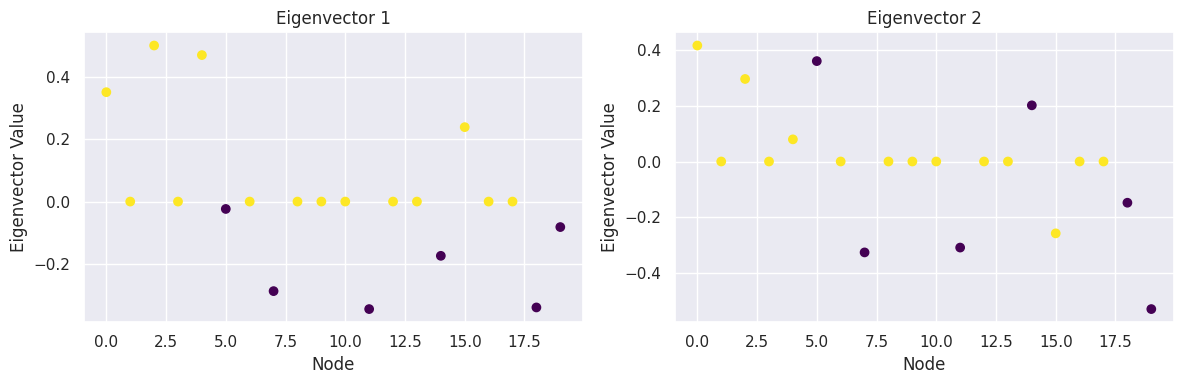

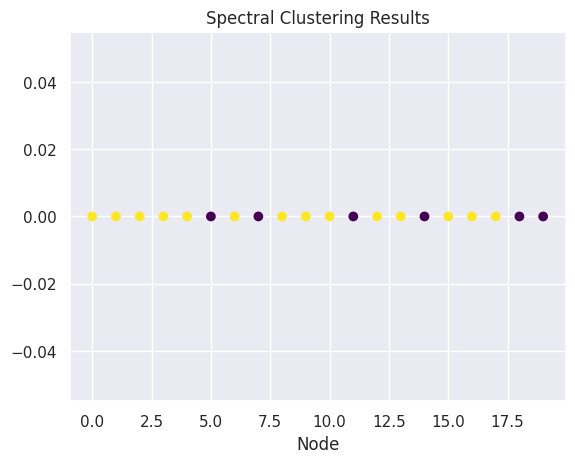

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Compute the degree matrix D
degrees = np.sum(W, axis=1)
D = np.diag(degrees)

# Add a small positive value to the diagonal elements of D
epsilon = 1e-8
D = D + epsilon * np.eye(len(W))

# Construct the random walk Laplacian matrix Lw = D^(-1) * L = I - D^(-1) * W
D_inv = np.linalg.inv(D)
Lw = np.eye(len(W)) - np.dot(D_inv, W)

# Compute the eigenpairs of Lw
lamb_w, phi_w = np.linalg.eig(Lw)

# Sort the eigenvalues and corresponding eigenvectors
sorted_indices = np.argsort(lamb_w)
sorted_lamb_w = lamb_w[sorted_indices]
sorted_phi_w = phi_w[:, sorted_indices].real

# Perform k-means clustering on the normalized eigenvectors
k = 2
normalized_phi_w = sorted_phi_w[:, :k] / np.linalg.norm(sorted_phi_w[:, :k], axis=1, keepdims=True)
normalized_phi_w[np.isnan(normalized_phi_w)] = 0  # Replace NaN values with zero
labels = KMeans(n_clusters=k).fit_predict(normalized_phi_w)

# Plot the relevant eigenvectors
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.scatter(range(len(W)), sorted_phi_w[:, 1], c=labels, cmap='viridis')
plt.xlabel('Node')
plt.ylabel('Eigenvector Value')
plt.title('Eigenvector 1')

plt.subplot(122)
plt.scatter(range(len(W)), sorted_phi_w[:, 2], c=labels, cmap='viridis')
plt.xlabel('Node')
plt.ylabel('Eigenvector Value')
plt.title('Eigenvector 2')

plt.tight_layout()
plt.show()

# Plot the clustering results
plt.scatter(range(len(W)), np.zeros(len(W)), c=labels, cmap='viridis')
plt.xlabel('Node')
plt.title('Spectral Clustering Results')
plt.show()


### 2.3 The symmetrically normalized Laplacian and spectral clustering

A second way to normalize the graph Laplacian $L$ is via the two-sided transformation $L_s = D^{-1/2}LD^{-1/2} = I - D^{-1/2}WD^{-1/2}$ leading to a symmetrically normalized Laplacian.

**Task:** Compute the eigenvalues and eigenvectors of the symmetrically normalized Laplacian matrix $L_s$. What happens when the parameter $\sigma$ is adjusted?

The sorted eigenvalues of $L_s$ should be:

`[-1.45716772e-16  3.81114111e-02  1.58422744e-01  2.41611944e-01 4.05358081e-01  5.11306121e-01  5.20553390e-01  8.73275842e-01 9.70902813e-01  1.10567472e+00  1.12671686e+00  1.32437722e+00 1.37674707e+00  1.42499101e+00  1.43121173e+00  1.44935052e+00 1.47947416e+00  1.75837981e+00  1.84156657e+00  1.96196798e+00]`

<ipython-input-24-6988188f449b>:10: RuntimeWarning: divide by zero encountered in true_divide
  degrees_sqrt_inv = np.where(degrees_sqrt > 0, 1 / degrees_sqrt, 0)


eigenvalues of Ls:
[-199.07    1.      1.      1.      1.      1.      1.      1.      1.
    1.      1.      1.      1.      1.      1.      1.      1.      1.
    1.      1.  ]


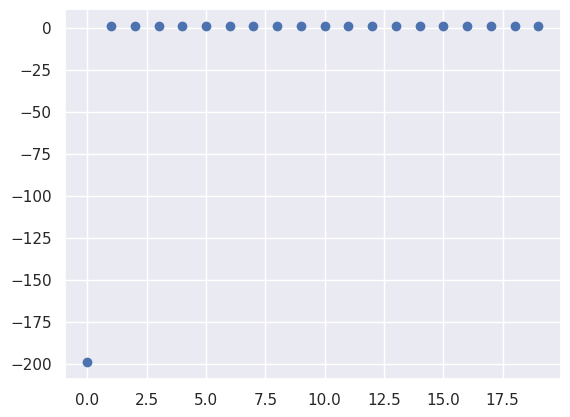

4 smallest eigenvectors of Ls:
[[-0.22  0.03 -0.02  0.01]
 [-0.22 -0.09  0.07 -0.  ]
 [-0.22  0.13  0.06  0.08]
 [-0.22  0.09 -0.01  0.11]
 [-0.22  0.12 -0.24 -0.02]
 [-0.22  0.12 -0.14 -0.4 ]
 [-0.22  0.12 -0.14  0.11]
 [-0.22  0.12 -0.14  0.38]
 [-0.22  0.12 -0.11  0.68]
 [-0.22  0.12 -0.11 -0.11]
 [-0.22  0.12 -0.11 -0.11]
 [-0.22  0.12 -0.11 -0.24]
 [-0.22  0.12 -0.12 -0.02]
 [-0.22 -0.43  0.43 -0.01]
 [-0.22 -0.43  0.43  0.14]
 [-0.22 -0.43  0.43  0.03]
 [-0.22 -0.45  0.4  -0.14]
 [-0.22  0.17 -0.2  -0.22]
 [-0.22  0.17 -0.2  -0.14]
 [-0.22  0.17 -0.17 -0.12]]


In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the degree matrix D
degrees = np.sum(W, axis=1)
D = np.diag(degrees)

# Compute the symmetrically normalized Laplacian matrix Ls
degrees_sqrt = np.sqrt(degrees)
degrees_sqrt_inv = np.where(degrees_sqrt > 0, 1 / degrees_sqrt, 0)
Ls = np.eye(len(W)) - np.dot(np.dot(degrees_sqrt_inv, W), degrees_sqrt_inv)

# Compute the eigenpairs of Ls
lamb_s, phi_s = np.linalg.eig(Ls)

# Sort the eigenvalues and corresponding eigenvectors
sorted_indices = np.argsort(lamb_s)
sorted_lamb_s = lamb_s[sorted_indices]
sorted_phi_s = phi_s[:, sorted_indices]

# Print the sorted eigenvalues
print('eigenvalues of Ls:')
print(sorted_lamb_s)

# Plot the first 20 eigenvalues
plt.scatter(range(20), sorted_lamb_s[:20])
plt.show()

# Print the 4 smallest eigenvectors
print('4 smallest eigenvectors of Ls:')
print(sorted_phi_s[:, :4])


# 3. scikit-learn 

**Task:** Repeat the spectral clustering of the two circles example from above using the `SpectralClustering` implementation from scikit-learn (Gaussian kernel with $\sigma=0.25$).

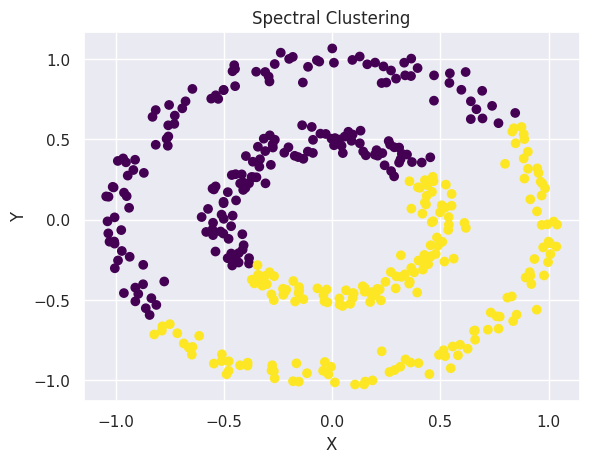

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.datasets import make_circles

# Generate the two circles dataset
X, _ = make_circles(n_samples=400, factor=0.5, noise=0.05)

# Perform spectral clustering
spectral_clustering = SpectralClustering(n_clusters=2, affinity='rbf', gamma=1 / (2 * 0.25**2))
labels = spectral_clustering.fit_predict(X)

# Visualize the clustering result
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Spectral Clustering')
plt.show()


**Task:** Perform spectral clustering on the following two moon example with 500 samples per class. Try different parameters like `affinity='nearest_neighbors'` for the `SpectralClustering` method.

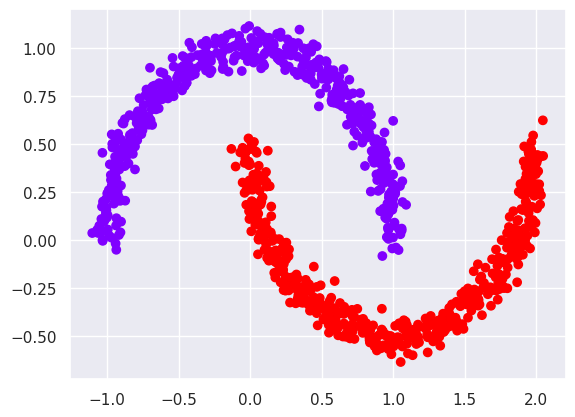

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


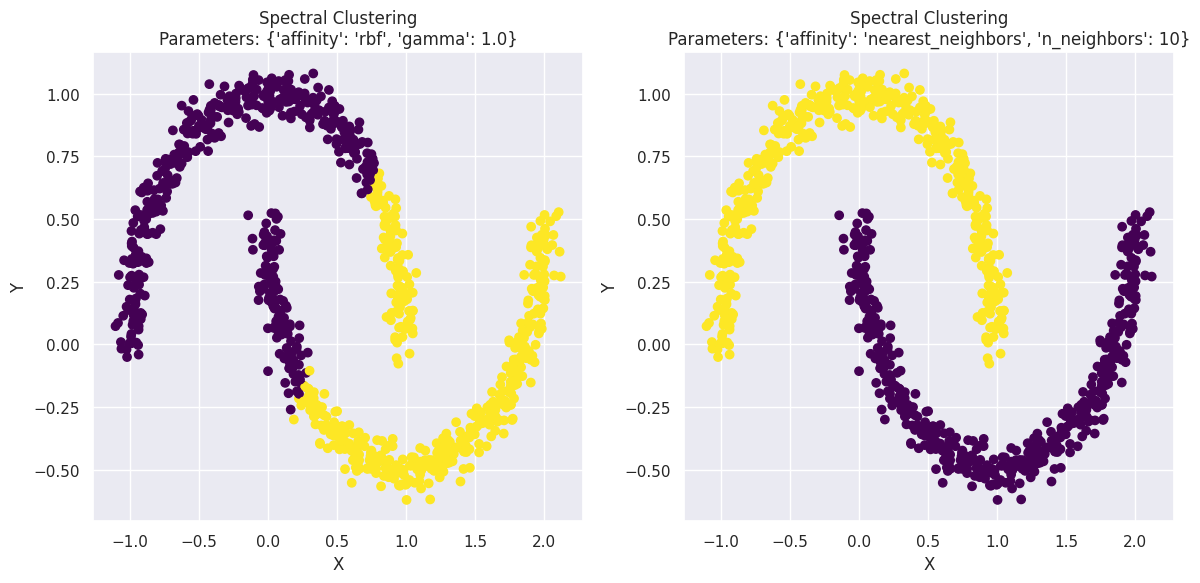

In [28]:
noisy_moons, noisy_moons_clusters = datasets.make_moons(n_samples=1000, noise=.05)
plt.scatter(noisy_moons[:,0], noisy_moons[:,1], c=noisy_moons_clusters, cmap='rainbow')
plt.show()

# solve task:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import SpectralClustering

# Generate the two moons dataset
X, _ = make_moons(n_samples=1000, noise=0.05, random_state=42)

# Perform spectral clustering with different parameters
parameters = [
    {'affinity': 'rbf', 'gamma': 1.0},
    {'affinity': 'nearest_neighbors', 'n_neighbors': 10}
]

plt.figure(figsize=(12, 6))

for i, params in enumerate(parameters, 1):
    # Perform spectral clustering
    spectral_clustering = SpectralClustering(n_clusters=2, **params)
    labels = spectral_clustering.fit_predict(X)

    # Visualize the clustering result
    plt.subplot(1, 2, i)
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f"Spectral Clustering\nParameters: {params}")

plt.tight_layout()
plt.show()


## Additional task: Spectral clustering for image segmentation

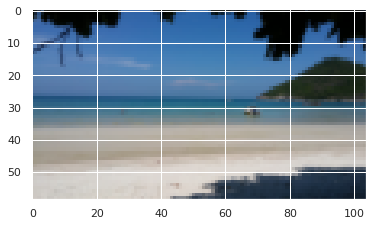

In [ ]:
from skimage.io import imread
from skimage.transform import rescale

image = imread('20170423_140149_eighth_resolution.png')
image_rescaled = rescale(image[:,:,:3], 0.2, multichannel=True)

plt.imshow(image_rescaled)
plt.show()

**Task:** Given the previous image, perform spectral clustering with $k=2,3,4,5$ classes and visualize the segmented images.

Hint: Start with the parameters `affinity='nearest_neighbors', n_neighbors=20, eigen_tol=1e-5, n_jobs=4, random_state=0` for `SpectralClustering`.